In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm_notebook as tqdm

In [2]:
tf = pd.read_pickle('TF.pkl')
entities = tf['entities'].tolist()
tf.index = pd.Index(entities, name='year')
tf_t = tf.loc[:, tf.columns != 'entities'].transpose()
tf_t.index = pd.to_datetime(tf_t.index, format="%Y")
tf_t = tf_t.fillna(0)

In [3]:
entities.__len__()

75312

In [12]:
start = '2000-01-01'
end = '2017-01-01'
target = '2018-01-01'
forecast = np.zeros(len(entities))
gt = np.zeros(len(entities))
for i, entry in enumerate(entities):
    gt[i] = tf_t.loc[target, entry]
    try:
        forecast[i] = sm.tsa.ARMA(tf_t.loc[start:end, entry], order=(2,0), freq='A').fit(maxiter=1000, disp=False).forecast()[0]
    except: 
        forecast[i] = tf_t.loc[end, entry]    

In [14]:
gt

array([ 0.27867884,  0.21938547, 29.50438095, ...,  0.08894006,
        0.09486939,  0.17788011])

In [15]:
forecast

array([ 0.20680586,  0.23265659, 30.8089025 , ...,  0.0672119 ,
        0.44463259,  0.11891337])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([18593., 15814.,  9752.,  7979.,  5072.,  3857.,  1965.,  2561.,
          946.,  1326.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

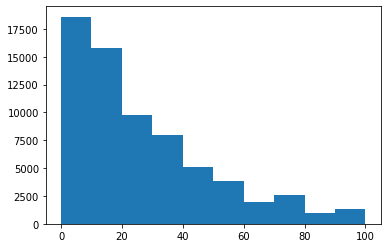

In [24]:
plt.hist(100*np.abs(gt - forecast)[gt != 0] / gt[gt != 0], range=(0, 100))

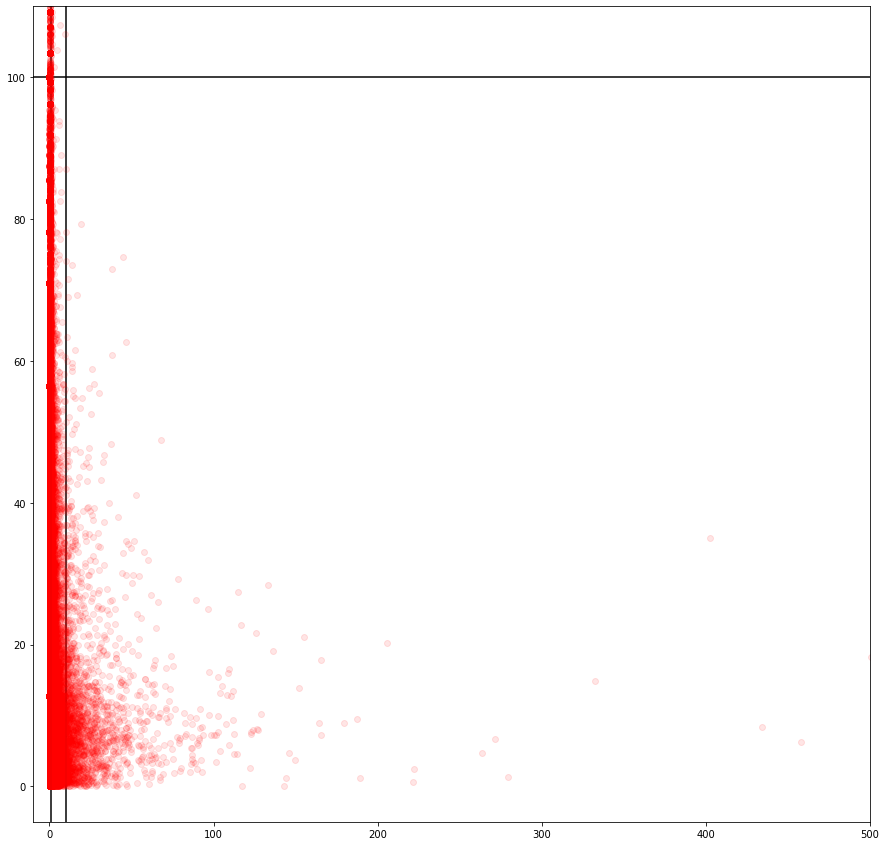

In [40]:
plt.figure(figsize=(15,15))
plt.plot(forecast[gt != 0], 100*np.abs(gt - forecast)[gt != 0] / gt[gt != 0], 'ro', alpha=0.1)
plt.xlim(-10, 500)
plt.ylim(-5, 110)
plt.hlines(100, -10, 500)
plt.vlines(1, -5, 110)
plt.vlines(10, -5, 110)

In [9]:
100 * (gt - forecast) / gt

/home/lsky/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/lsky/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([        nan,         nan, 10.95581317, ...,         nan,
               nan,         nan])

In [121]:
endog[['gases']]

year,gases
1936-01-01,92.045344
1937-01-01,88.556529
1938-01-01,66.410512
1939-01-01,70.788108
1940-01-01,75.753477
1941-01-01,83.015109
1942-01-01,78.134391
1943-01-01,96.333313
1944-01-01,91.530717
1945-01-01,52.859053


In [122]:
res.fittedvalues

1936-01-01    77.161710
1937-01-01    82.212266
1938-01-01    81.028385
1939-01-01    73.513439
1940-01-01    74.998916
1941-01-01    76.683845
1942-01-01    79.147980
1943-01-01    77.491776
1944-01-01    83.667329
1945-01-01    82.037634
1946-01-01    68.914938
dtype: float64

In [123]:
tf_t.loc['1947-01-01':'1947-01-01', 'gases']

1947-01-01    63.318099
Name: gases, dtype: float64

In [128]:
res.forecast(2)

(array([70.11009128, 74.76884017]),
 array([13.22662203, 13.96739476]),
 array([[ 44.18638846,  96.03379409],
        [ 47.39324948, 102.14443087]]))

In [ ]:
res.

In [92]:
exog = endog['gases']
mod = sm.tsa.VARMAX(endog[['condoms', 'disease']], order=(2,0), trend='nc', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/home/lsky/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['condoms', 'disease']   No. Observations:                   11
Model:                            VARX(2)   Log Likelihood                 -82.729
Date:                    Tue, 16 Jul 2019   AIC                            191.457
Time:                            02:13:27   BIC                            196.630
Sample:                        01-01-1936   HQIC                           188.197
                             - 01-01-1946                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):           0.08, 0.38
Prob(Q):                               nan   Prob(JB):                   0.96, 0.83
Heteroskedasticity (H):         3.13, 0.09   Skew:                       0.20, 0.22
Prob(H) (two-sided):            0.30, 0.04   Kurtosis:                   2.86, 2.20


In [ ]:
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [ ]:
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='nc', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [4]:
dta = sm.datasets.webuse('lutkepohl2', 'http://www.stata-press.com/data/r12/')

In [11]:
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [12]:
exog = endog['dln_consump']
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(2,0), trend='nc', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/home/lsky/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                            VARX(2)   Log Likelihood                 361.039
Date:                    Tue, 16 Jul 2019   AIC                           -696.078
Time:                            01:12:44   BIC                           -665.951
Sample:                        04-01-1960   HQIC                          -684.049
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                61.34, 39.27   Jarque-Bera (JB):          11.26, 2.40
Prob(Q):                        0.02, 0.50   Prob(JB):                   0.00, 0.30
Heteroskedasticity (H):         0.45, 0.40   Skew:                      0.16, -0.38
Prob(H) (two-sided):            0.05, 0.03   Kurtosis:                   4.87, 3.44
